In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [18]:
# Get the life satisfaction index data
oecd_bli = pd.read_csv('BLI.csv', thousands=',')

In [19]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [20]:
# Get the gross domestic product data file
gdp_per_capita = pd.read_csv('WEO_Data.csv', thousands=',', delimiter=',', 
                             encoding='latin1', na_values="n/a")

In [21]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",600,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414,2011.0


In [22]:
# Used to join together two tables in order to make the dataframe we want
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [23]:
# Create the table with X-y data for us
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
print(country_stats.head())

               GDP per capita  Life satisfaction
Country                                         
Poland                  12495                6.1
Chile                   13341                6.5
Latvia                  13619                5.9
Lithuania               14210                5.9
Czech Republic          17257                6.7


In [24]:
# Convert pandas series to numpy array
country_stats['X'] = country_stats["GDP per capita"].to_numpy(dtype=int)
country_stats['y'] = country_stats["Life satisfaction"].to_numpy(dtype=float)
print(country_stats.head())

               GDP per capita  Life satisfaction      X    y
Country                                                     
Poland                  12495                6.1  12495  6.1
Chile                   13341                6.5  13341  6.5
Latvia                  13619                5.9  13619  5.9
Lithuania               14210                5.9  14210  5.9
Czech Republic          17257                6.7  17257  6.7


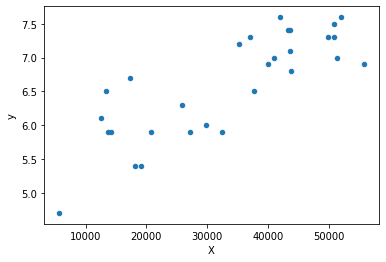

In [25]:
# Let's draw a scatter plot
country_stats.plot(kind='scatter', x='X', y='y')
plt.show()

In [26]:
# We want to use linear regression
model = sklearn.linear_model.LinearRegression()

X = country_stats['X']
y = country_stats['y']
print(X.shape, y.shape)

(29,) (29,)


In [27]:
# We need our vectors to have a column dimension
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
print(X.shape, y.shape)

(29, 1) (29, 1)


In [28]:
# Perform the linear regression
model.fit(X,y)

# Forecast a new value
X_new=[[22587]] # Cyprus
print(model.predict(X_new))

# Tell us what the slope and intercept are for the fitted model
print(model.coef_, model.intercept_)

# What is R^2?
model.score(X,y)

[[6.13886445]]
[[4.26638172e-05]] [5.17521681]


0.6692207819606082

In [29]:
# After all of our data preparation work, switching methods is easy
import sklearn.neighbors
model2=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

model2.fit(X,y)
X_new=[[22587]] # Cyprus
print(model2.predict(X_new))

# How does KNN with K=3 compare to Linear Regression?
model2.score(X,y)

[[5.86666667]]


0.7711979378646046